<a href="https://colab.research.google.com/github/JazmineOrtizMarin/Simulaci-n-2/blob/main/M%C3%A9todo_de_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import random as rd
import timeit

Aciertos= 938
I= 0.6253333333333333


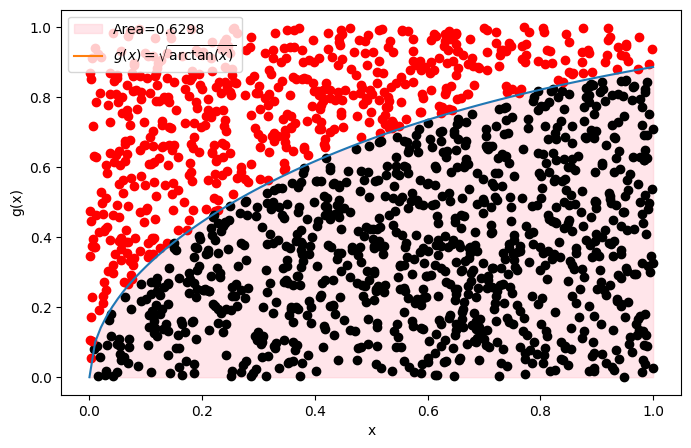

In [3]:
# Método de Monte Carlo de Acierto y Error
# ‐---------------------------------------

# 1. Encerramos la curva en un rectángulo fácil de medir.
# 2. Generamos puntos aleatorios dentro del rectángulo.
# 3. Contamos cuántos caen debajo de la curva g(x).
# 4. La proporción de puntos dentro respecto al total, multiplicada por el área del rectángulo,
#    nos da una estimación del área bajo la curva.

# Definimos la función g(x) = sqrt(arctan(x)) g(x):
def g(x):
  return np.sqrt(np.arctan(x))

# Puntos para graficar la curva
X = np.linspace(0,1,100)
Y = g(X)

aciertos=0 # Contador de puntos.
N=1500 # Número de puntos aleatorios.

a, b = 0, 1 # Intervalo [a,b]=[0,1]
# Cálculo del área con integración numéricas para comparar.
area, error = quad(g,a,b) # También me ayuda con el area bajo la curva XD

# Gráfica base con la curva y el área
plt.figure(figsize=(8,5))
plt.fill_between (X,Y,alpha=0.4, color="pink", label=f"Area={area:.4f}") #solo para colorear el área bajo la curva
plt.plot(X,Y)

# SIMULACIÓN
# ----------
for i in range (N):
  # Generamos un número aleatorio dentro del rectángulo.
  x = rd.random()
  y = rd.random()

  # Verificamos si cae debajo de la curva
  if y <= g(x):
    plt.scatter(x,y,color="black") # punto "acierto"
    aciertos+=1
  else:
    plt.scatter(x,y,color="red") # punto "fallo"

plt.xlabel("x")
plt.ylabel("g(x)")
plt.plot(x,y,label=r"$g(x)= \sqrt{\arctan(x)}$")
print("Aciertos=",aciertos)

# Estimación del Área
I=aciertos/N
print("I=",I)

plt.legend()
plt.show()

In [4]:
# Función estimación
# ------------------

# 1. Vamos generando N puntos aleatorios dentro del rectángulo.
# 2. En cada paso contamos cuántos caen debajo de la curva g(x).
# 3. Guardamos la proporción acumulada de aciertos hasta ese momento.
# 4. Esto nos da una lista que muestra cómo evoluciona la estimación
#    de la integral conforme aumentan los puntos.

def estimacion (N):
  lista=[] # Guardamos los valores parciales
  aciertos = 0 # Contador de puntos dentro de la curva

  for i in range (N):
    # Puntos aleatorios
    x = rd.random()
    y = rd.random()

    # Verificamos si cae debajo de la curva
    if y <= g(x):
      aciertos += 1

    # Estimación parcial del área
    I=aciertos/(1+i)
    lista.append(I)
  return lista

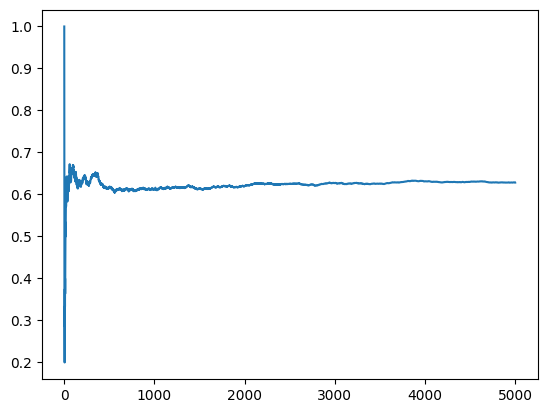

In [5]:
L=estimacion(5000) # Ejecución
plt.plot(L)

**Separaccion del trabajo en claase aqui:**

---



In [8]:
def estimacion (n):
  aciertos = 0 # Contador de puntos dentro de la curva

  for i in range (n):
    # Puntos aleatorios
    x = rd.random()
    y = rd.random()

    # Verificamos si cae debajo de la curva
    if y <= g(x):
      aciertos += 1

    # Estimación parcial del área
    I=aciertos/(n)
  return I

In [9]:
L=estimacion(5000)
estimacion(1000)

0.65

In [10]:
def mc_acierto_y_error (n,N):
  lista_mc = []
  for i in range (N):
    e = estimacion(n)
    lista_mc.append(e)
  return np.mean(lista_mc),np.var(lista_mc),np.std(lista_mc)